In [2]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

In [3]:
df = pd.read_csv("car details v4.csv")
df.head()

,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Engine,Max Power,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
0,Honda,Amaze 1.2 VX i-VTEC,505000,2017,87150,Petrol,Manual,Pune,Grey,First,Corporate,1198 cc,87 bhp @ 6000 rpm,109 Nm @ 4500 rpm,FWD,3990.0,1680.0,1505.0,5.0,35.0
1,Maruti Suzuki,Swift DZire VDI,450000,2014,75000,Diesel,Manual,Ludhiana,White,Second,Individual,1248 cc,74 bhp @ 4000 rpm,190 Nm @ 2000 rpm,FWD,3995.0,1695.0,1555.0,5.0,42.0
2,Hyundai,i10 Magna 1.2 Kappa2,220000,2011,67000,Petrol,Manual,Lucknow,Maroon,First,Individual,1197 cc,79 bhp @ 6000 rpm,112.7619 Nm @ 4000 rpm,FWD,3585.0,1595.0,1550.0,5.0,35.0
3,Toyota,Glanza G,799000,2019,37500,Petrol,Manual,Mangalore,Red,First,Individual,1197 cc,82 bhp @ 6000 rpm,113 Nm @ 4200 rpm,FWD,3995.0,1745.0,1510.0,5.0,37.0
4,Toyota,Innova 2.4 VX 7 STR [2016-2020],1950000,2018,69000,Diesel,Manual,Mumbai,Grey,First,Individual,2393 cc,148 bhp @ 3400 rpm,343 Nm @ 1400 rpm,RWD,4735.0,1830.0,1795.0,7.0,55.0


In [4]:
df.shape

(2059, 20)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2059 entries, 0 to 2058
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Make                2059 non-null   object 
 1   Model               2059 non-null   object 
 2   Price               2059 non-null   int64  
 3   Year                2059 non-null   int64  
 4   Kilometer           2059 non-null   int64  
 5   Fuel Type           2059 non-null   object 
 6   Transmission        2059 non-null   object 
 7   Location            2059 non-null   object 
 8   Color               2059 non-null   object 
 9   Owner               2059 non-null   object 
 10  Seller Type         2059 non-null   object 
 11  Engine              1979 non-null   object 
 12  Max Power           1979 non-null   object 
 13  Max Torque          1979 non-null   object 
 14  Drivetrain          1923 non-null   object 
 15  Length              1995 non-null   float64
 16  Width 

In [6]:
df.isnull().sum()

Make                    0
Model                   0
Price                   0
Year                    0
Kilometer               0
Fuel Type               0
Transmission            0
Location                0
Color                   0
Owner                   0
Seller Type             0
Engine                 80
Max Power              80
Max Torque             80
Drivetrain            136
Length                 64
Width                  64
Height                 64
Seating Capacity       64
Fuel Tank Capacity    113
dtype: int64

In [7]:
df.duplicated().sum()

np.int64(0)

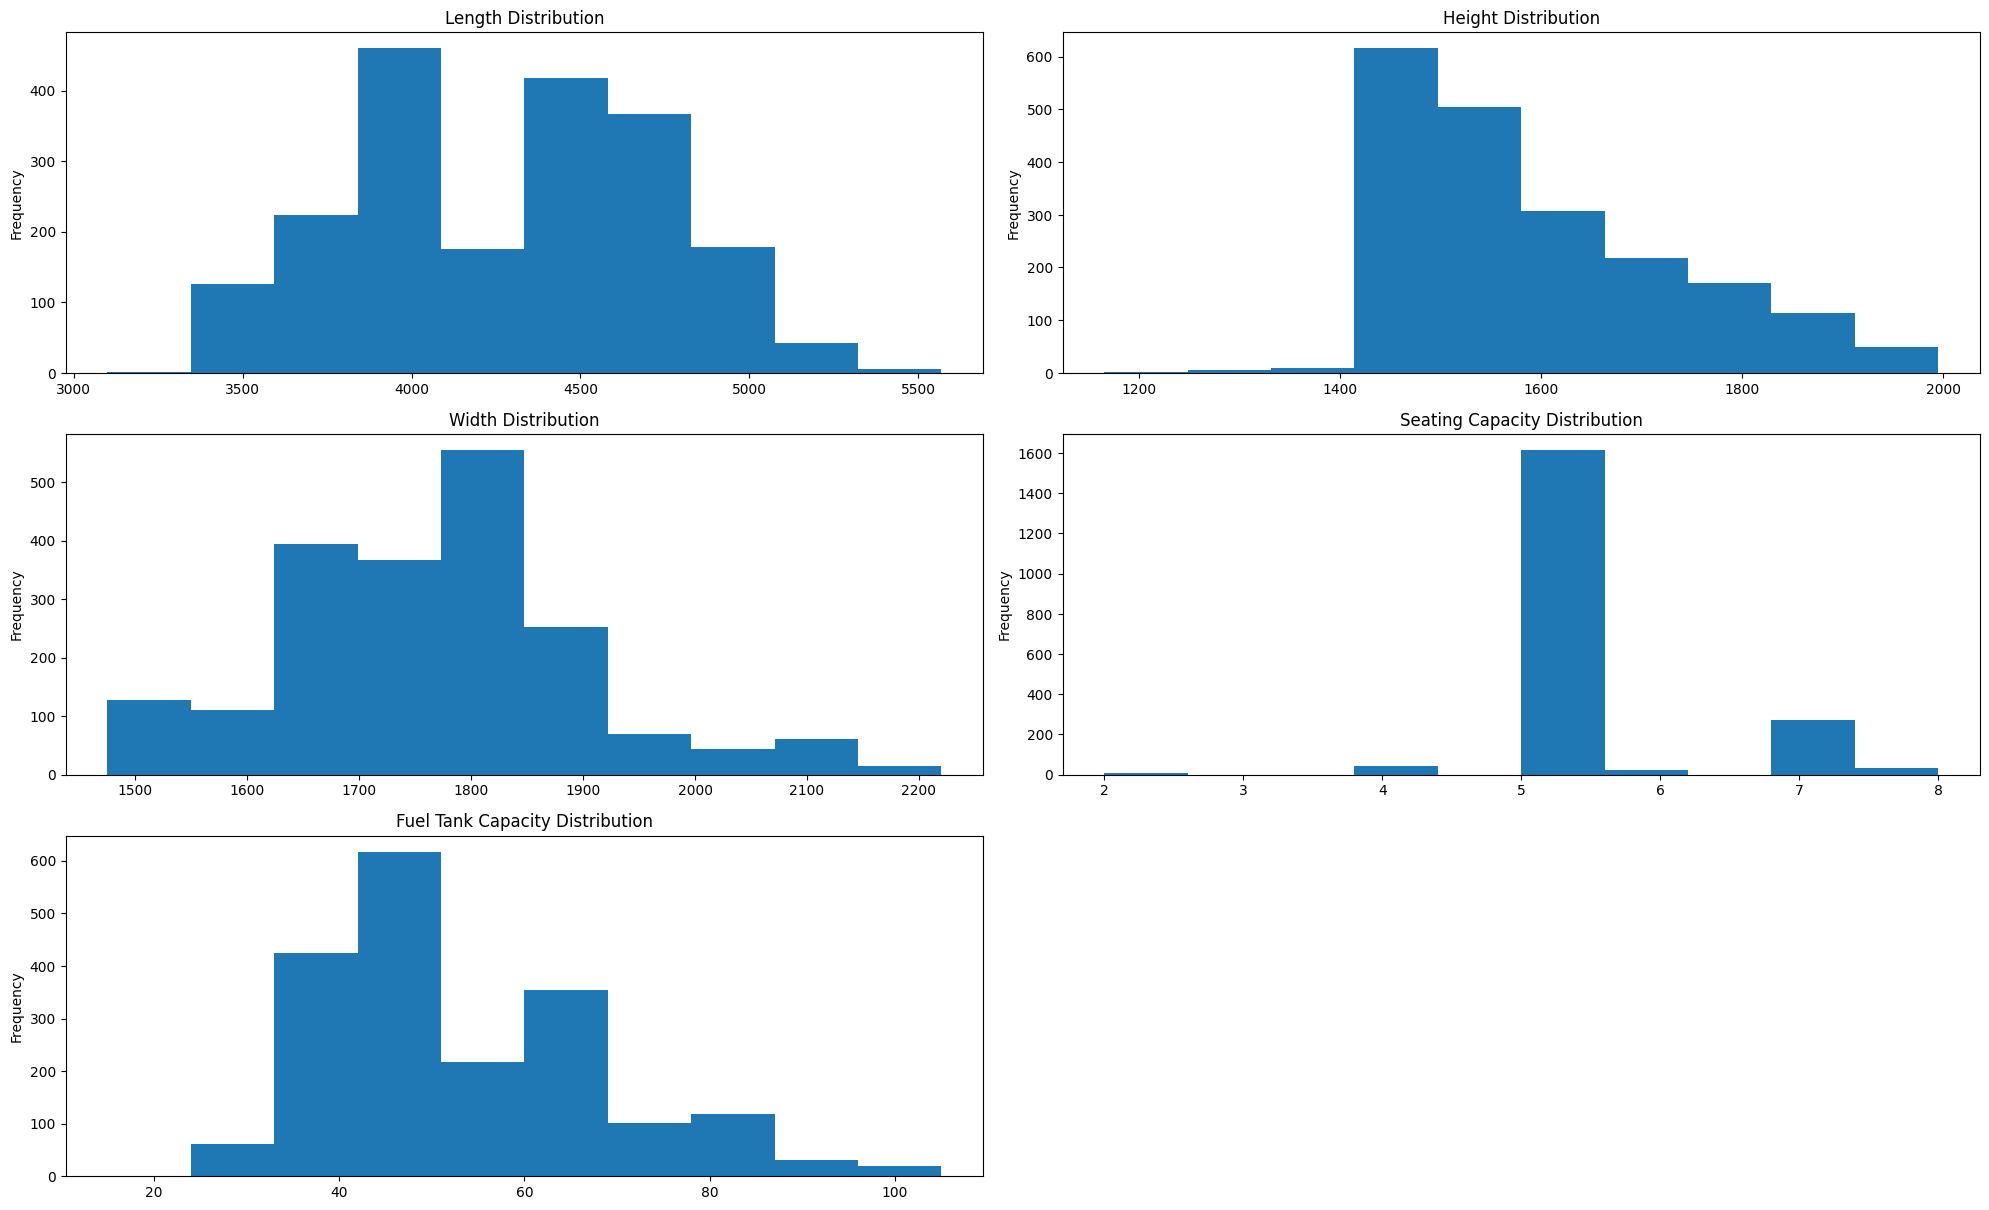

In [8]:
#Visualize the distribution
plt.figure(figsize=(20, 20))
plt.subplot(5, 2, 1)
df['Length'].plot(kind='hist', title='Histogram')
plt.title('Length Distribution')
plt.subplot(5, 2, 2)
df['Height'].plot(kind='hist', title='Histogram')
plt.title('Height Distribution')
plt.subplot(5, 2, 3)
df['Width'].plot(kind='hist', title='Histogram')
plt.title('Width Distribution')
plt.subplot(5, 2, 4)
df['Seating Capacity'].plot(kind='hist', title='Histogram')
plt.title('Seating Capacity Distribution')
plt.subplot(5, 2, 5)
df['Fuel Tank Capacity'].plot(kind='hist', title='Histogram')
plt.title('Fuel Tank Capacity Distribution')
plt.tight_layout()
plt.show()

In [9]:
length_skewness = df['Length'].skew()
height_skewness = df['Height'].skew()
width_skewness = df['Width'].skew()
seating_capacity_skewness = df['Seating Capacity'].skew()
fuel_tank_capacity_skewness = df['Fuel Tank Capacity'].skew()
print(f"length_skewness: {length_skewness:.2f}")
print(f"height_skewness: {height_skewness:.2f}")
print(f"width_skewness: {width_skewness:.2f}")
print(f"seating_capacity_skewness: {seating_capacity_skewness:.2f}")
print(f"fuel_tank_capacity_skewness: {fuel_tank_capacity_skewness:.2f}")

length_skewness: -0.02
height_skewness: 0.84
width_skewness: 0.31
seating_capacity_skewness: 1.47
fuel_tank_capacity_skewness: 0.85


- For Length and Width, the mean is suitable because their distributions are close to symmetric.

- For Height, which has higher skewness, the median is better because: It is less affected by outliers (e.g., if some values are unusually large) & Ensures the imputed value represents the central tendency better than the mean.

- seating_capacity and fuel_tank_capacity both columns show significant right skewness (> 0.5), thus the median is suitable.

- For Categorical features we fill with 'Mode'

In [10]:
df.head()

,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Engine,Max Power,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
0,Honda,Amaze 1.2 VX i-VTEC,505000,2017,87150,Petrol,Manual,Pune,Grey,First,Corporate,1198 cc,87 bhp @ 6000 rpm,109 Nm @ 4500 rpm,FWD,3990.0,1680.0,1505.0,5.0,35.0
1,Maruti Suzuki,Swift DZire VDI,450000,2014,75000,Diesel,Manual,Ludhiana,White,Second,Individual,1248 cc,74 bhp @ 4000 rpm,190 Nm @ 2000 rpm,FWD,3995.0,1695.0,1555.0,5.0,42.0
2,Hyundai,i10 Magna 1.2 Kappa2,220000,2011,67000,Petrol,Manual,Lucknow,Maroon,First,Individual,1197 cc,79 bhp @ 6000 rpm,112.7619 Nm @ 4000 rpm,FWD,3585.0,1595.0,1550.0,5.0,35.0
3,Toyota,Glanza G,799000,2019,37500,Petrol,Manual,Mangalore,Red,First,Individual,1197 cc,82 bhp @ 6000 rpm,113 Nm @ 4200 rpm,FWD,3995.0,1745.0,1510.0,5.0,37.0
4,Toyota,Innova 2.4 VX 7 STR [2016-2020],1950000,2018,69000,Diesel,Manual,Mumbai,Grey,First,Individual,2393 cc,148 bhp @ 3400 rpm,343 Nm @ 1400 rpm,RWD,4735.0,1830.0,1795.0,7.0,55.0


In [11]:
df['Length'].fillna(df['Length'].mean(), inplace=True)
df['Width'].fillna(df['Width'].mean(), inplace=True)

df['Height'].fillna(df['Height'].median(), inplace=True)
df['Seating Capacity'].fillna(df['Seating Capacity'].median(), inplace=True)
df['Fuel Tank Capacity'].fillna(df['Fuel Tank Capacity'].median(), inplace=True)

df['Max Power'].fillna(df['Max Power'].mode()[0], inplace=True)
df['Engine'].fillna(df['Engine'].mode()[0], inplace=True)
df['Drivetrain'].fillna(df['Drivetrain'].mode()[0], inplace=True)
df['Max Torque'].fillna(df['Max Torque'].mode()[0], inplace=True)


C:\Users\Sri Hari\AppData\Local\Temp\ipykernel_34020\3750961405.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Max Power'].fillna(df['Max Power'].mode()[0], inplace=True)
C:\Users\Sri Hari\AppData\Local\Temp\ipykernel_34020\3750961405.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behave

In [12]:
df.isnull().sum()

Make                  0
Model                 0
Price                 0
Year                  0
Kilometer             0
Fuel Type             0
Transmission          0
Location              0
Color                 0
Owner                 0
Seller Type           0
Engine                0
Max Power             0
Max Torque            0
Drivetrain            0
Length                0
Width                 0
Height                0
Seating Capacity      0
Fuel Tank Capacity    0
dtype: int64

In [13]:
df.head()

,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Engine,Max Power,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
0,Honda,Amaze 1.2 VX i-VTEC,505000,2017,87150,Petrol,Manual,Pune,Grey,First,Corporate,1198 cc,87 bhp @ 6000 rpm,109 Nm @ 4500 rpm,FWD,3990.0,1680.0,1505.0,5.0,35.0
1,Maruti Suzuki,Swift DZire VDI,450000,2014,75000,Diesel,Manual,Ludhiana,White,Second,Individual,1248 cc,74 bhp @ 4000 rpm,190 Nm @ 2000 rpm,FWD,3995.0,1695.0,1555.0,5.0,42.0
2,Hyundai,i10 Magna 1.2 Kappa2,220000,2011,67000,Petrol,Manual,Lucknow,Maroon,First,Individual,1197 cc,79 bhp @ 6000 rpm,112.7619 Nm @ 4000 rpm,FWD,3585.0,1595.0,1550.0,5.0,35.0
3,Toyota,Glanza G,799000,2019,37500,Petrol,Manual,Mangalore,Red,First,Individual,1197 cc,82 bhp @ 6000 rpm,113 Nm @ 4200 rpm,FWD,3995.0,1745.0,1510.0,5.0,37.0
4,Toyota,Innova 2.4 VX 7 STR [2016-2020],1950000,2018,69000,Diesel,Manual,Mumbai,Grey,First,Individual,2393 cc,148 bhp @ 3400 rpm,343 Nm @ 1400 rpm,RWD,4735.0,1830.0,1795.0,7.0,55.0


In [14]:
df['Max Power'].head()

0     87 bhp @ 6000 rpm
1     74 bhp @ 4000 rpm
2     79 bhp @ 6000 rpm
3     82 bhp @ 6000 rpm
4    148 bhp @ 3400 rpm
Name: Max Power, dtype: object

In [15]:
df[['horsepower', 'rpm']] = df['Max Power'].str.extract(r'(\d+)\s*bhp\s*@\s*(\d+)\s*rpm').astype(float)
df['power_per_rpm'] = df['horsepower'] / df['rpm']
df = df.drop(['horsepower', 'rpm', 'Max Power'], axis=1)
df.head()

,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Engine,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity,power_per_rpm
0,Honda,Amaze 1.2 VX i-VTEC,505000,2017,87150,Petrol,Manual,Pune,Grey,First,Corporate,1198 cc,109 Nm @ 4500 rpm,FWD,3990.0,1680.0,1505.0,5.0,35.0,0.014500
1,Maruti Suzuki,Swift DZire VDI,450000,2014,75000,Diesel,Manual,Ludhiana,White,Second,Individual,1248 cc,190 Nm @ 2000 rpm,FWD,3995.0,1695.0,1555.0,5.0,42.0,0.018500
2,Hyundai,i10 Magna 1.2 Kappa2,220000,2011,67000,Petrol,Manual,Lucknow,Maroon,First,Individual,1197 cc,112.7619 Nm @ 4000 rpm,FWD,3585.0,1595.0,1550.0,5.0,35.0,0.013167
3,Toyota,Glanza G,799000,2019,37500,Petrol,Manual,Mangalore,Red,First,Individual,1197 cc,113 Nm @ 4200 rpm,FWD,3995.0,1745.0,1510.0,5.0,37.0,0.013667
4,Toyota,Innova 2.4 VX 7 STR [2016-2020],1950000,2018,69000,Diesel,Manual,Mumbai,Grey,First,Individual,2393 cc,343 Nm @ 1400 rpm,RWD,4735.0,1830.0,1795.0,7.0,55.0,0.043529


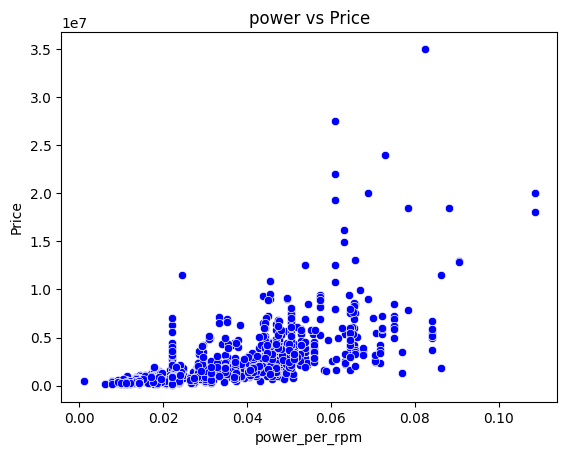

In [16]:
sns.scatterplot(data=df, x="power_per_rpm", y="Price", color = 'blue')
plt.title("power vs Price")
plt.show()

In [17]:
df['Max Torque'].head()

0         109 Nm @ 4500 rpm
1         190 Nm @ 2000 rpm
2    112.7619 Nm @ 4000 rpm
3         113 Nm @ 4200 rpm
4         343 Nm @ 1400 rpm
Name: Max Torque, dtype: object

In [18]:
df[['NM', 'rpm']] = df['Max Torque'].str.extract(r'(\d+)\s*Nm\s*@\s*(\d+)\s*rpm').astype(float)
df['torque_per_rpm'] = df['NM'] / df['rpm']
df = df.drop(['NM', 'rpm', 'Max Torque'], axis=1)

In [19]:
df.head()

,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Engine,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity,power_per_rpm,torque_per_rpm
0,Honda,Amaze 1.2 VX i-VTEC,505000,2017,87150,Petrol,Manual,Pune,Grey,First,Corporate,1198 cc,FWD,3990.0,1680.0,1505.0,5.0,35.0,0.014500,0.024222
1,Maruti Suzuki,Swift DZire VDI,450000,2014,75000,Diesel,Manual,Ludhiana,White,Second,Individual,1248 cc,FWD,3995.0,1695.0,1555.0,5.0,42.0,0.018500,0.095000
2,Hyundai,i10 Magna 1.2 Kappa2,220000,2011,67000,Petrol,Manual,Lucknow,Maroon,First,Individual,1197 cc,FWD,3585.0,1595.0,1550.0,5.0,35.0,0.013167,1.904750
3,Toyota,Glanza G,799000,2019,37500,Petrol,Manual,Mangalore,Red,First,Individual,1197 cc,FWD,3995.0,1745.0,1510.0,5.0,37.0,0.013667,0.026905
4,Toyota,Innova 2.4 VX 7 STR [2016-2020],1950000,2018,69000,Diesel,Manual,Mumbai,Grey,First,Individual,2393 cc,RWD,4735.0,1830.0,1795.0,7.0,55.0,0.043529,0.245000


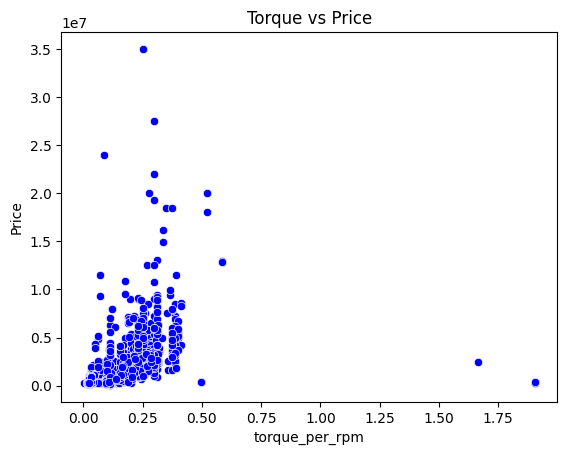

In [20]:
sns.scatterplot(data=df, x="torque_per_rpm", y="Price", color = 'blue')
plt.title("Torque vs Price")
plt.show()

In [21]:
df.isnull().sum()

Make                    0
Model                   0
Price                   0
Year                    0
Kilometer               0
Fuel Type               0
Transmission            0
Location                0
Color                   0
Owner                   0
Seller Type             0
Engine                  0
Drivetrain              0
Length                  0
Width                   0
Height                  0
Seating Capacity        0
Fuel Tank Capacity      0
power_per_rpm         132
torque_per_rpm        128
dtype: int64

In [22]:
df['torque_per_rpm'].fillna(df['torque_per_rpm'].median(), inplace=True)
df['power_per_rpm'].fillna(df['power_per_rpm'].median(), inplace=True)

C:\Users\Sri Hari\AppData\Local\Temp\ipykernel_34020\3745092796.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['torque_per_rpm'].fillna(df['torque_per_rpm'].median(), inplace=True)
C:\Users\Sri Hari\AppData\Local\Temp\ipykernel_34020\3745092796.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values alwa

In [23]:
df.isnull().sum()

Make                  0
Model                 0
Price                 0
Year                  0
Kilometer             0
Fuel Type             0
Transmission          0
Location              0
Color                 0
Owner                 0
Seller Type           0
Engine                0
Drivetrain            0
Length                0
Width                 0
Height                0
Seating Capacity      0
Fuel Tank Capacity    0
power_per_rpm         0
torque_per_rpm        0
dtype: int64

In [24]:
df.head()

,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Engine,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity,power_per_rpm,torque_per_rpm
0,Honda,Amaze 1.2 VX i-VTEC,505000,2017,87150,Petrol,Manual,Pune,Grey,First,Corporate,1198 cc,FWD,3990.0,1680.0,1505.0,5.0,35.0,0.014500,0.024222
1,Maruti Suzuki,Swift DZire VDI,450000,2014,75000,Diesel,Manual,Ludhiana,White,Second,Individual,1248 cc,FWD,3995.0,1695.0,1555.0,5.0,42.0,0.018500,0.095000
2,Hyundai,i10 Magna 1.2 Kappa2,220000,2011,67000,Petrol,Manual,Lucknow,Maroon,First,Individual,1197 cc,FWD,3585.0,1595.0,1550.0,5.0,35.0,0.013167,1.904750
3,Toyota,Glanza G,799000,2019,37500,Petrol,Manual,Mangalore,Red,First,Individual,1197 cc,FWD,3995.0,1745.0,1510.0,5.0,37.0,0.013667,0.026905
4,Toyota,Innova 2.4 VX 7 STR [2016-2020],1950000,2018,69000,Diesel,Manual,Mumbai,Grey,First,Individual,2393 cc,RWD,4735.0,1830.0,1795.0,7.0,55.0,0.043529,0.245000


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2059 entries, 0 to 2058
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Make                2059 non-null   object 
 1   Model               2059 non-null   object 
 2   Price               2059 non-null   int64  
 3   Year                2059 non-null   int64  
 4   Kilometer           2059 non-null   int64  
 5   Fuel Type           2059 non-null   object 
 6   Transmission        2059 non-null   object 
 7   Location            2059 non-null   object 
 8   Color               2059 non-null   object 
 9   Owner               2059 non-null   object 
 10  Seller Type         2059 non-null   object 
 11  Engine              2059 non-null   object 
 12  Drivetrain          2059 non-null   object 
 13  Length              2059 non-null   float64
 14  Width               2059 non-null   float64
 15  Height              2059 non-null   float64
 16  Seatin

In [26]:
df['Engine'].head()

0    1198 cc
1    1248 cc
2    1197 cc
3    1197 cc
4    2393 cc
Name: Engine, dtype: object

In [27]:
df['Engine'] = df['Engine'].str.replace('cc','').astype(float)

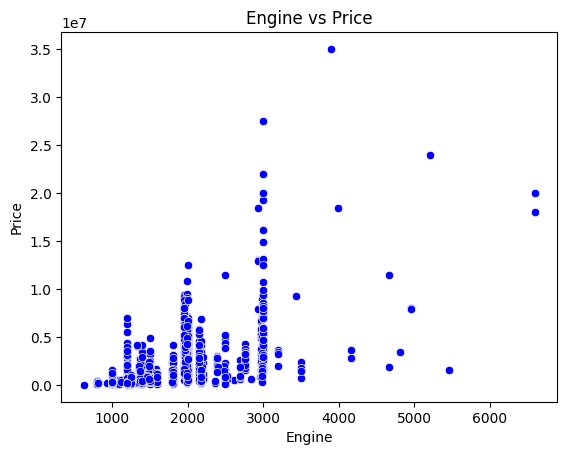

In [28]:
sns.scatterplot(data=df, x="Engine", y="Price", color = 'blue')
plt.title("Engine vs Price")
plt.show()

In [29]:
max_Year = df['Year'].max()
df['Age'] = max_Year - df['Year']
df = df.drop('Year', axis=1)

In [30]:
df.head()

,Make,Model,Price,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Engine,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity,power_per_rpm,torque_per_rpm,Age
0,Honda,Amaze 1.2 VX i-VTEC,505000,87150,Petrol,Manual,Pune,Grey,First,Corporate,1198.0,FWD,3990.0,1680.0,1505.0,5.0,35.0,0.014500,0.024222,5
1,Maruti Suzuki,Swift DZire VDI,450000,75000,Diesel,Manual,Ludhiana,White,Second,Individual,1248.0,FWD,3995.0,1695.0,1555.0,5.0,42.0,0.018500,0.095000,8
2,Hyundai,i10 Magna 1.2 Kappa2,220000,67000,Petrol,Manual,Lucknow,Maroon,First,Individual,1197.0,FWD,3585.0,1595.0,1550.0,5.0,35.0,0.013167,1.904750,11
3,Toyota,Glanza G,799000,37500,Petrol,Manual,Mangalore,Red,First,Individual,1197.0,FWD,3995.0,1745.0,1510.0,5.0,37.0,0.013667,0.026905,3
4,Toyota,Innova 2.4 VX 7 STR [2016-2020],1950000,69000,Diesel,Manual,Mumbai,Grey,First,Individual,2393.0,RWD,4735.0,1830.0,1795.0,7.0,55.0,0.043529,0.245000,4


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2059 entries, 0 to 2058
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Make                2059 non-null   object 
 1   Model               2059 non-null   object 
 2   Price               2059 non-null   int64  
 3   Kilometer           2059 non-null   int64  
 4   Fuel Type           2059 non-null   object 
 5   Transmission        2059 non-null   object 
 6   Location            2059 non-null   object 
 7   Color               2059 non-null   object 
 8   Owner               2059 non-null   object 
 9   Seller Type         2059 non-null   object 
 10  Engine              2059 non-null   float64
 11  Drivetrain          2059 non-null   object 
 12  Length              2059 non-null   float64
 13  Width               2059 non-null   float64
 14  Height              2059 non-null   float64
 15  Seating Capacity    2059 non-null   float64
 16  Fuel T

In [32]:
data_num = df.select_dtypes(include=[np.number])
data_cat = df.select_dtypes(exclude=[np.number])

In [33]:
data_num.head()

,Price,Kilometer,Engine,Length,Width,Height,Seating Capacity,Fuel Tank Capacity,power_per_rpm,torque_per_rpm,Age
0,505000,87150,1198.0,3990.0,1680.0,1505.0,5.0,35.0,0.014500,0.024222,5
1,450000,75000,1248.0,3995.0,1695.0,1555.0,5.0,42.0,0.018500,0.095000,8
2,220000,67000,1197.0,3585.0,1595.0,1550.0,5.0,35.0,0.013167,1.904750,11
3,799000,37500,1197.0,3995.0,1745.0,1510.0,5.0,37.0,0.013667,0.026905,3
4,1950000,69000,2393.0,4735.0,1830.0,1795.0,7.0,55.0,0.043529,0.245000,4


<Figure size 2000x1000 with 0 Axes>

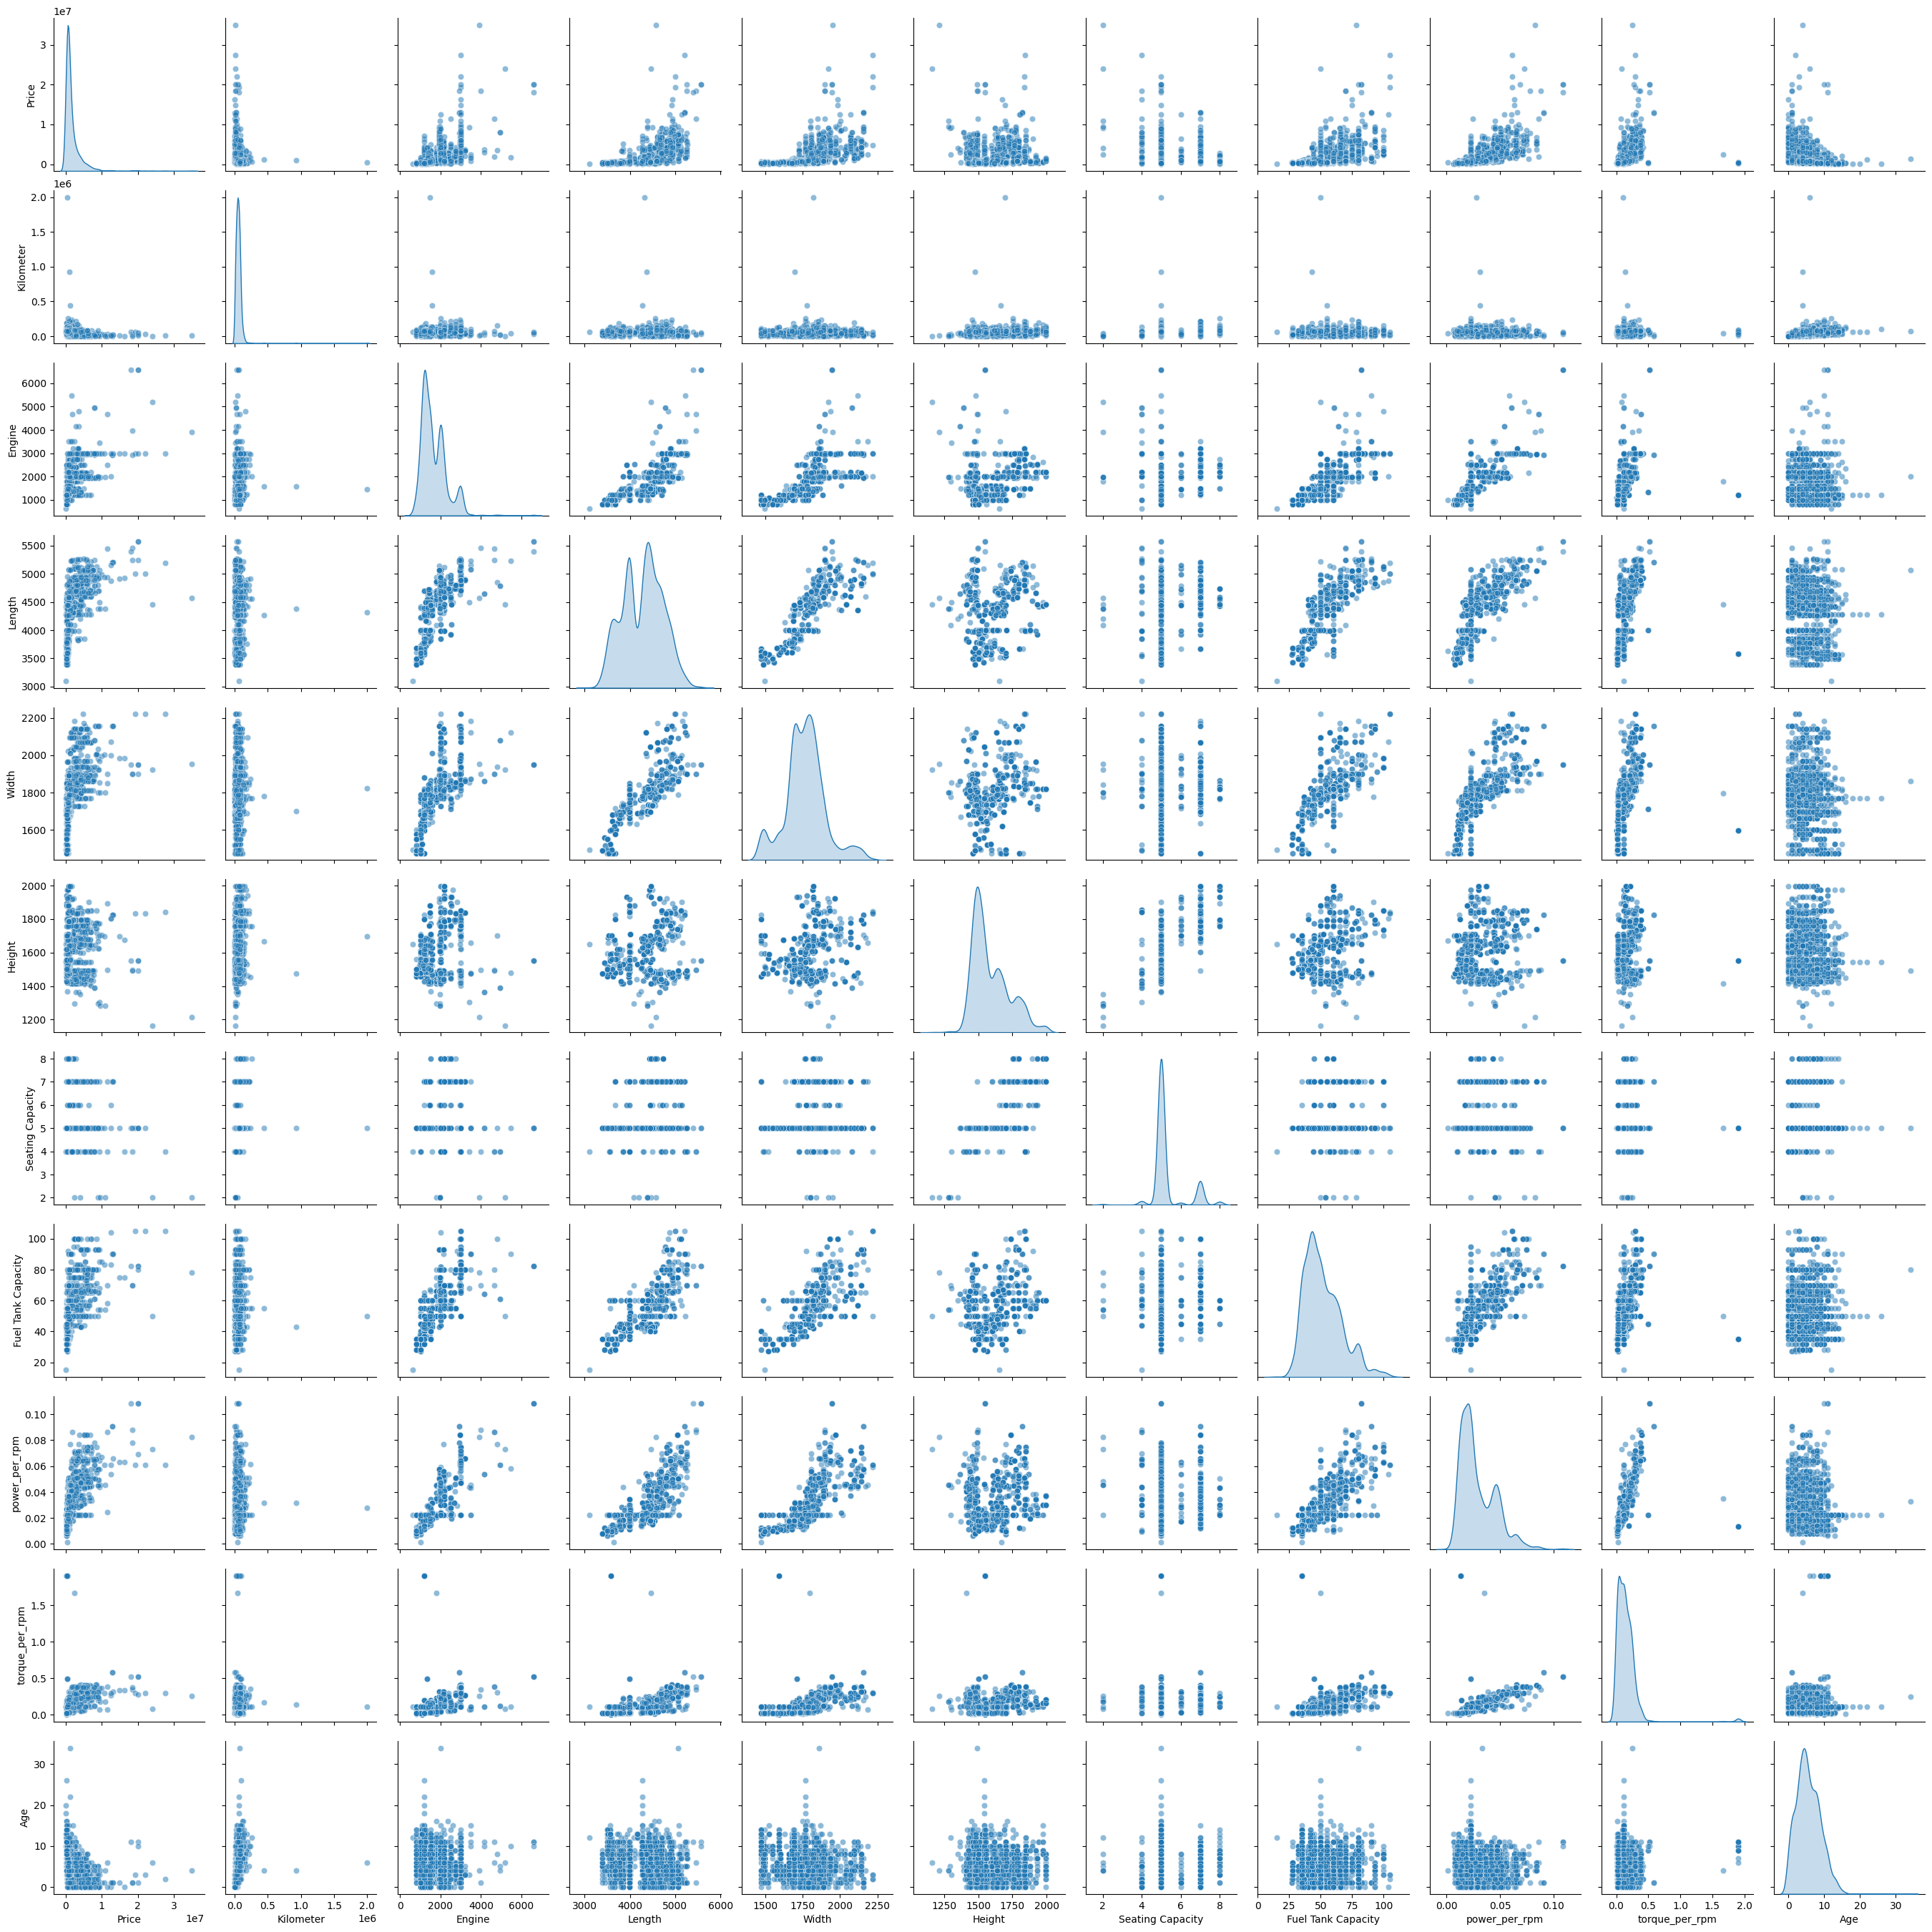

In [34]:
#plotting pairplot
plt.figure(figsize=(20, 10))
sns.pairplot(data_num,
             diag_kind='kde',
             plot_kws={'alpha': 0.5})
plt.show()

<Axes: >

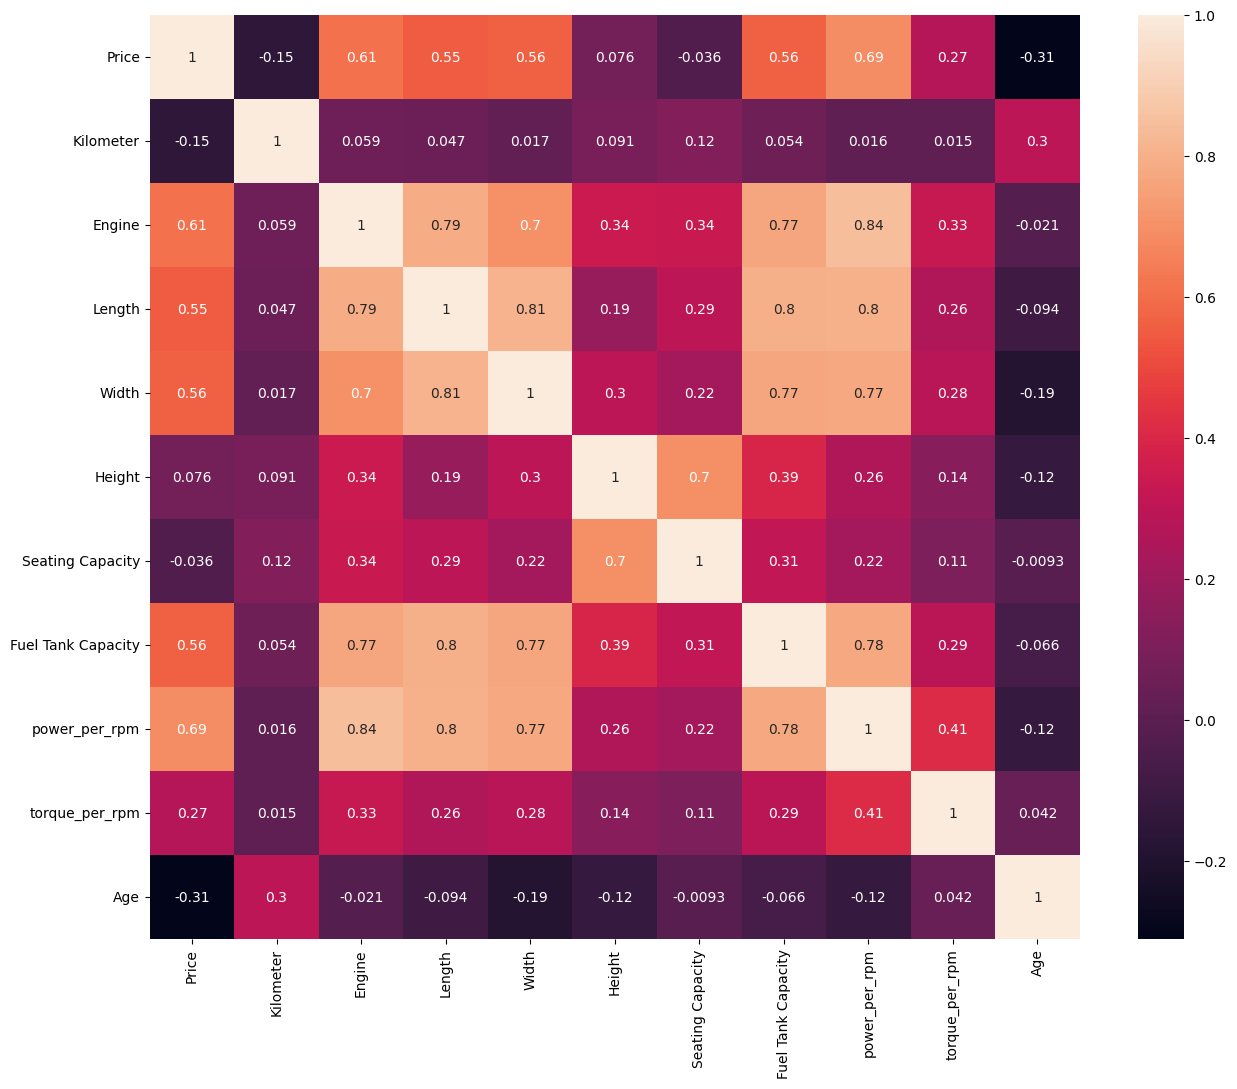

In [35]:
corr = data_num.corr()
plt.figure(figsize=(15, 12))
sns.heatmap(corr, annot=True)

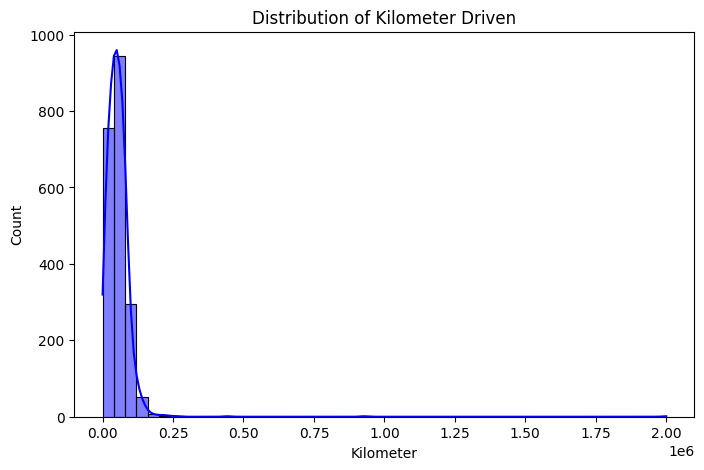

In [36]:
plt.figure(figsize=(8, 5))
sns.histplot(data_num['Kilometer'], bins=50, kde=True, color='blue')
plt.title('Distribution of Kilometer Driven')
plt.show()

<Axes: ylabel='count'>

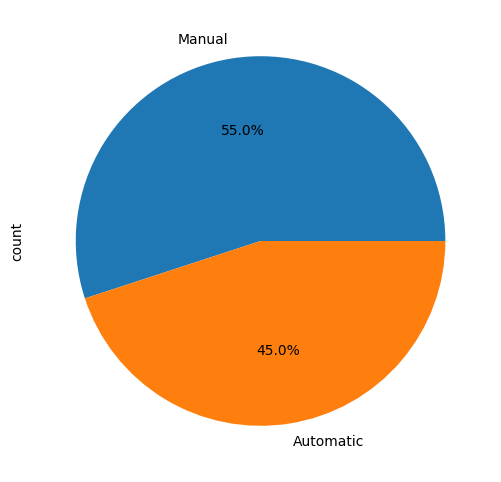

In [37]:
df['Transmission'].value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(6, 6))

<Axes: xlabel='Drivetrain'>

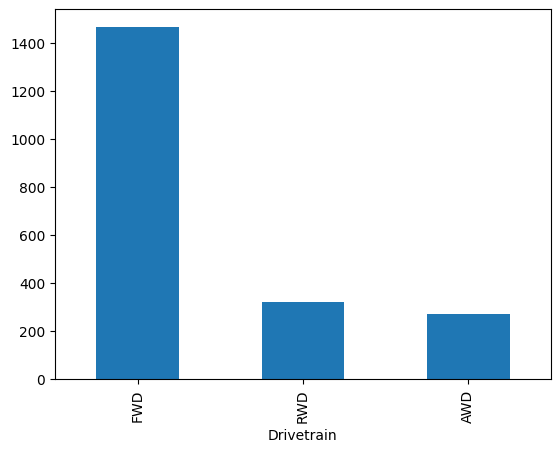

In [38]:
df['Drivetrain'].value_counts().plot(kind = 'bar')

<Axes: xlabel='Color'>

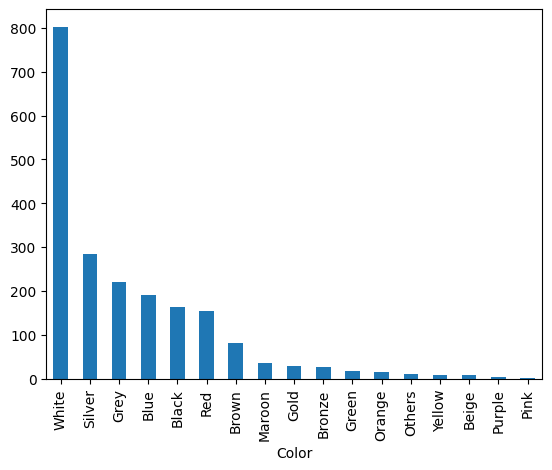

In [39]:
df['Color'].value_counts().plot(kind = 'bar')

In [40]:
df.head()

,Make,Model,Price,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Engine,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity,power_per_rpm,torque_per_rpm,Age
0,Honda,Amaze 1.2 VX i-VTEC,505000,87150,Petrol,Manual,Pune,Grey,First,Corporate,1198.0,FWD,3990.0,1680.0,1505.0,5.0,35.0,0.014500,0.024222,5
1,Maruti Suzuki,Swift DZire VDI,450000,75000,Diesel,Manual,Ludhiana,White,Second,Individual,1248.0,FWD,3995.0,1695.0,1555.0,5.0,42.0,0.018500,0.095000,8
2,Hyundai,i10 Magna 1.2 Kappa2,220000,67000,Petrol,Manual,Lucknow,Maroon,First,Individual,1197.0,FWD,3585.0,1595.0,1550.0,5.0,35.0,0.013167,1.904750,11
3,Toyota,Glanza G,799000,37500,Petrol,Manual,Mangalore,Red,First,Individual,1197.0,FWD,3995.0,1745.0,1510.0,5.0,37.0,0.013667,0.026905,3
4,Toyota,Innova 2.4 VX 7 STR [2016-2020],1950000,69000,Diesel,Manual,Mumbai,Grey,First,Individual,2393.0,RWD,4735.0,1830.0,1795.0,7.0,55.0,0.043529,0.245000,4


In [41]:
top_10_expensive = data.groupby('Make')['Price'].mean().nlargest(10).reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='Price', y='Make', data=top_10_expensive, palette='viridis')
plt.title('Top 10 Most Expensive Car Makes (Average Price)')
plt.xlabel('Average Price ($)')
plt.ylabel('Car Make')
plt.tight_layout()
plt.show()

NameError: name 'data' is not defined

In [42]:
df['Make'].nunique()

33

C:\Users\Sri Hari\AppData\Local\Temp\ipykernel_34020\2559503634.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Price', y='Make', data=top_10_cheapest, palette='viridis')


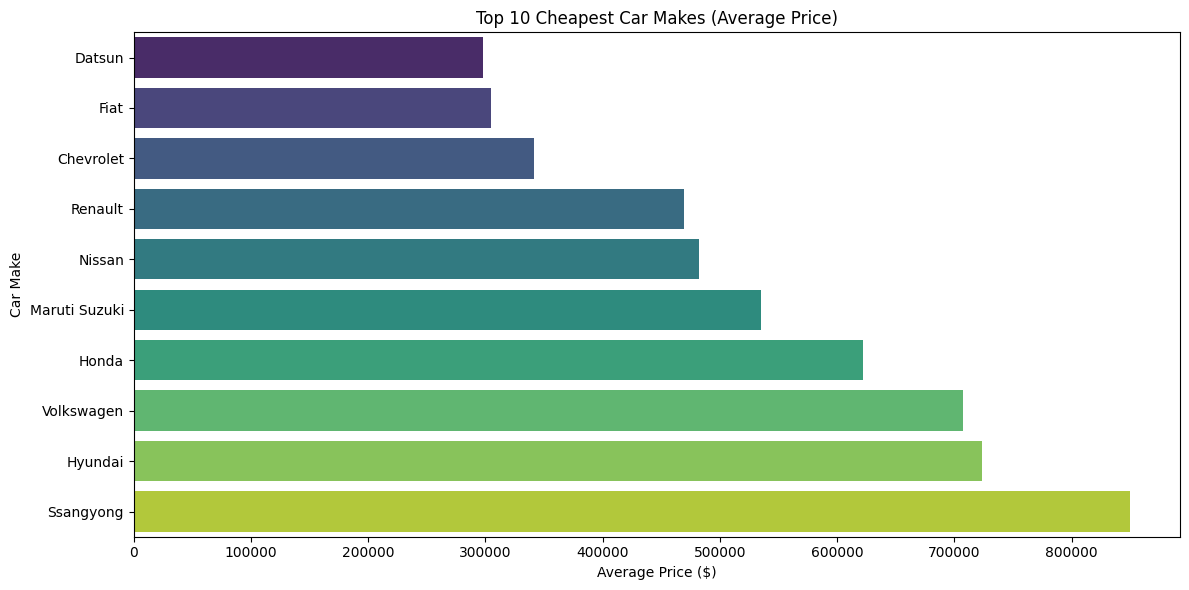

In [43]:
top_10_cheapest = df.groupby('Make')['Price'].mean().nsmallest(10).reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='Price', y='Make', data=top_10_cheapest, palette='viridis')
plt.title('Top 10 Cheapest Car Makes (Average Price)')
plt.xlabel('Average Price ($)')
plt.ylabel('Car Make')
plt.tight_layout()
plt.show()

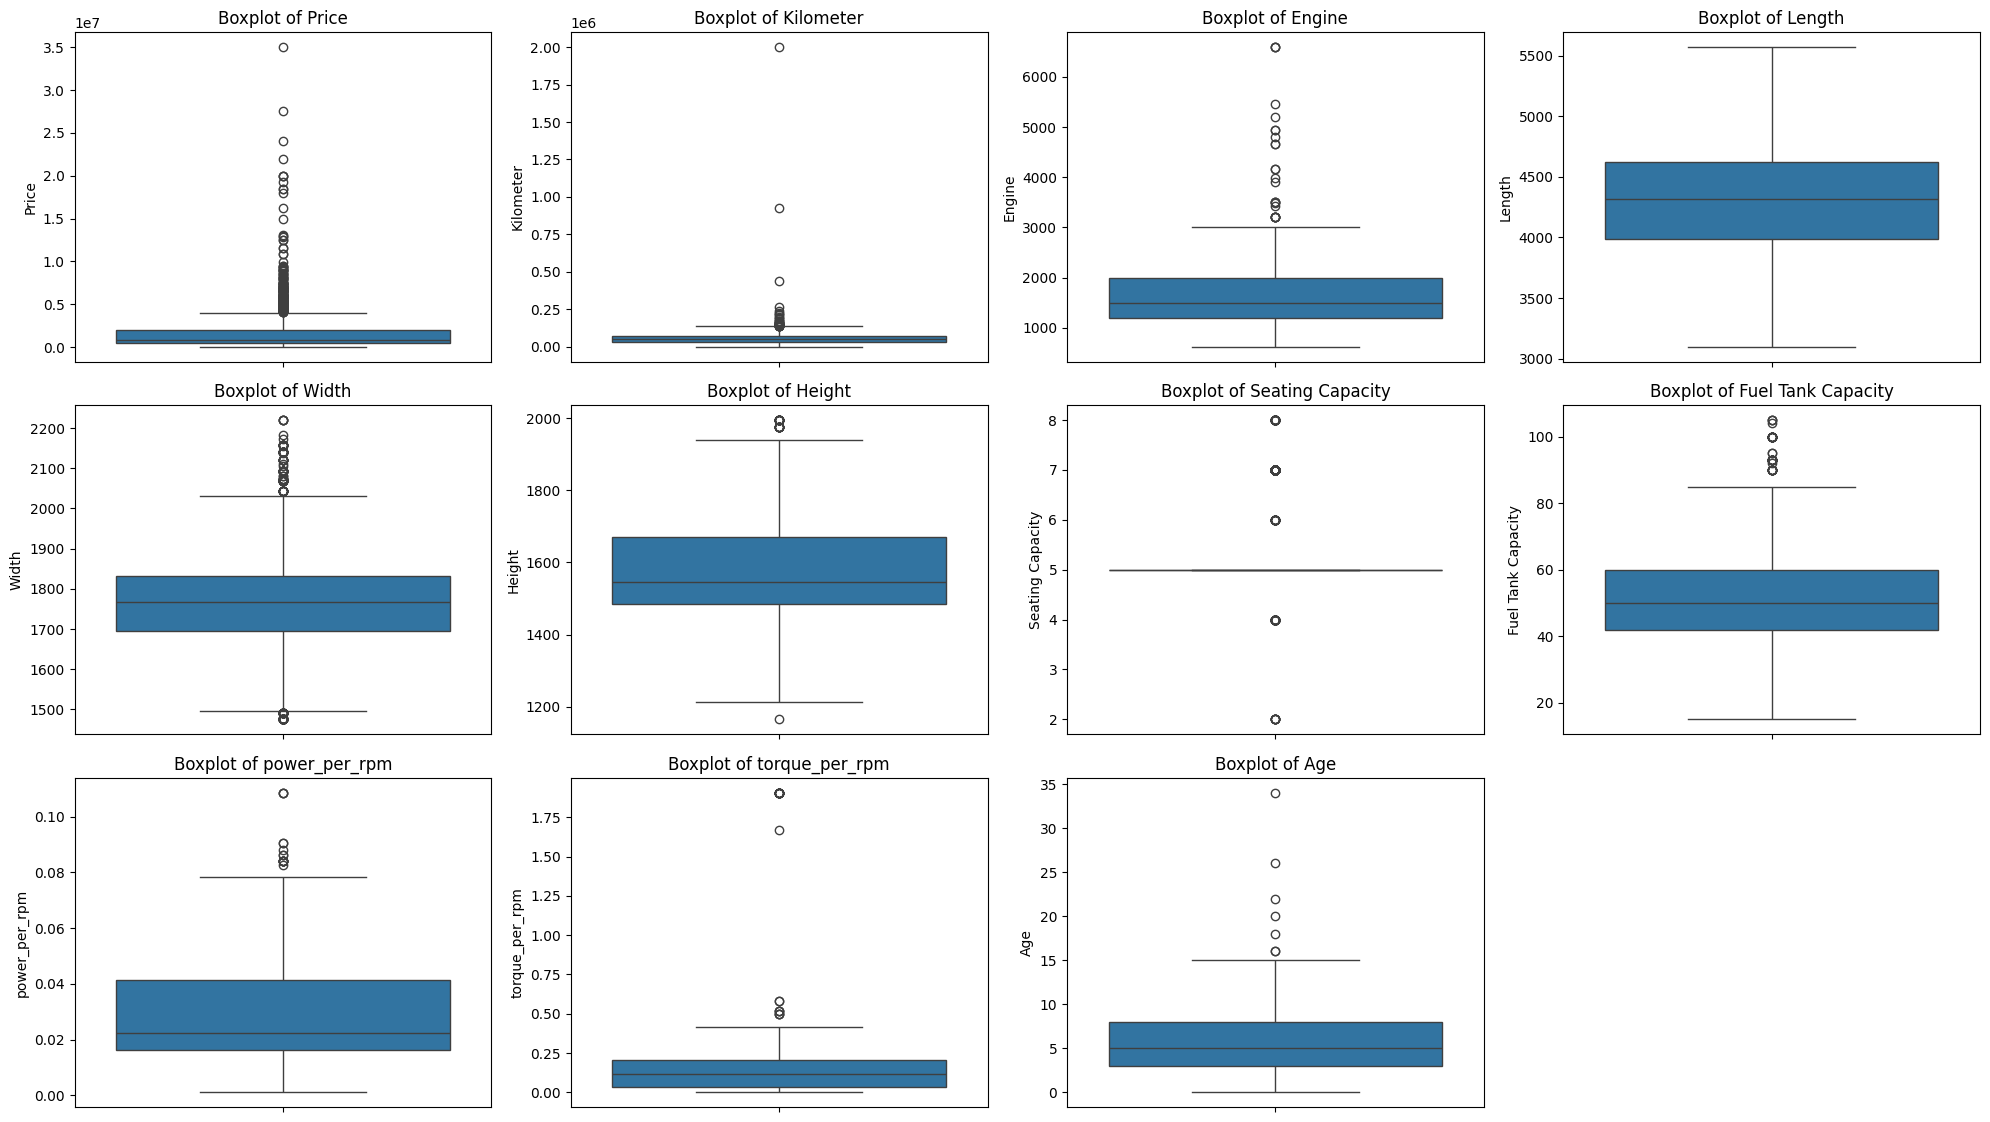

In [44]:
plt.figure(figsize=(20, 15))
for i, feature in enumerate(data_num, 1):
    plt.subplot(4, 4, i)
    sns.boxplot(y=data_num[feature])
    plt.title(f'Boxplot of {feature}')
plt.tight_layout()
plt.show()

In [45]:
data_num.shape

(2059, 11)

In [46]:
for feature in data_num:
    q1 = data_num[feature].quantile(0.25)
    q3 = data_num[feature].quantile(0.75)
    iqr = q3 - q1
    outliers = data_num[(data_num[feature] < (q1 - 1.5*iqr)) | (data_num[feature] > (q3 + 1.5*iqr))]
    print(f"{feature}: {len(outliers)} outliers")
    data_num = data_num.drop(outliers.index)
    data_cat = data_cat.drop(outliers.index)
    print(f"Removed {len(outliers)} outliers from {feature}")

Price: 215 outliers
Removed 215 outliers from Price
Kilometer: 40 outliers
Removed 40 outliers from Kilometer
Engine: 14 outliers
Removed 14 outliers from Engine
Length: 6 outliers
Removed 6 outliers from Length
Width: 163 outliers
Removed 163 outliers from Width
Height: 57 outliers
Removed 57 outliers from Height
Seating Capacity: 229 outliers
Removed 229 outliers from Seating Capacity
Fuel Tank Capacity: 37 outliers
Removed 37 outliers from Fuel Tank Capacity
power_per_rpm: 27 outliers
Removed 27 outliers from power_per_rpm
torque_per_rpm: 20 outliers
Removed 20 outliers from torque_per_rpm
Age: 6 outliers
Removed 6 outliers from Age


In [47]:
data_num.shape

(1245, 11)

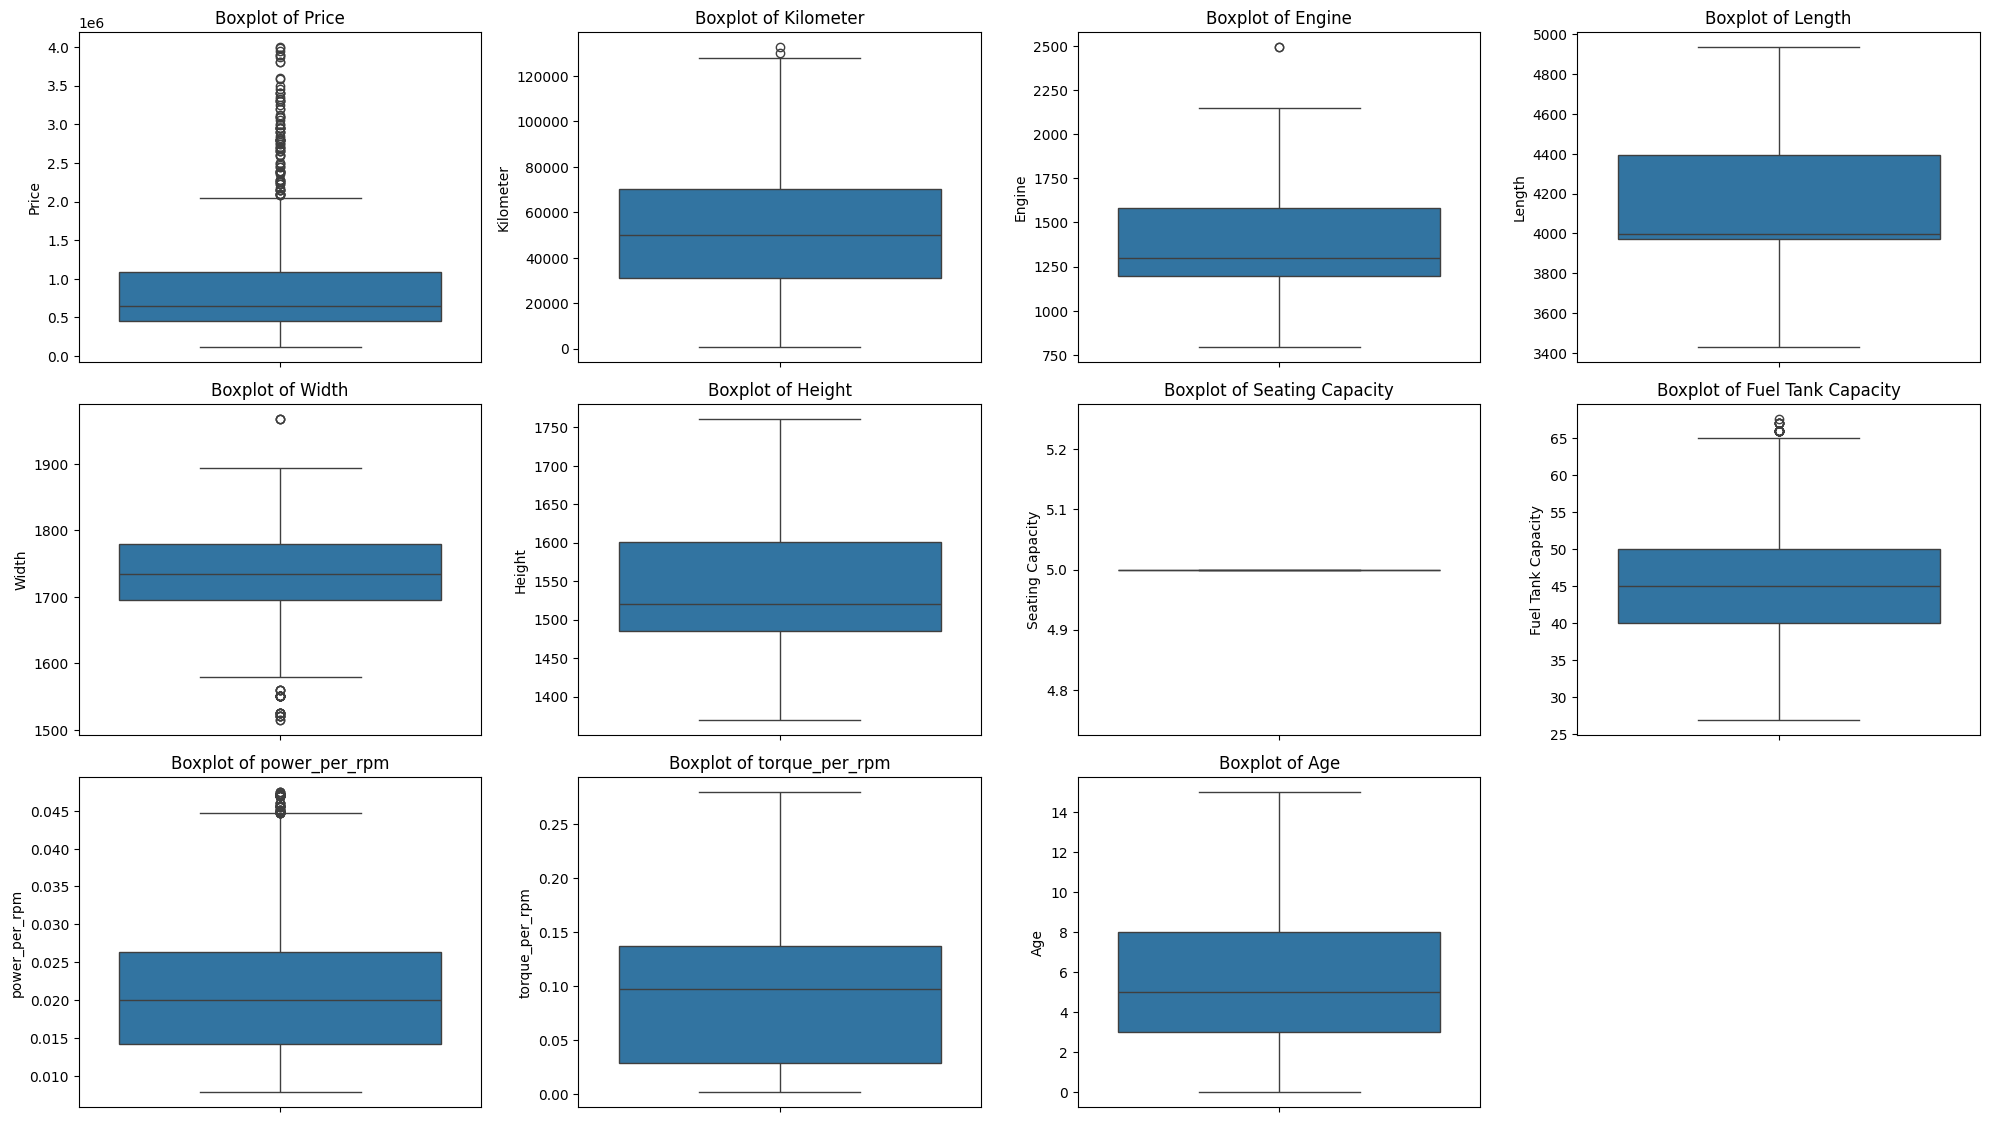

In [48]:
plt.figure(figsize=(20, 15))
for i, feature in enumerate(data_num, 1):
    plt.subplot(4, 4, i)
    sns.boxplot(y=data_num[feature])
    plt.title(f'Boxplot of {feature}')
plt.tight_layout()
plt.show()

In [49]:
df.head()

,Make,Model,Price,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Engine,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity,power_per_rpm,torque_per_rpm,Age
0,Honda,Amaze 1.2 VX i-VTEC,505000,87150,Petrol,Manual,Pune,Grey,First,Corporate,1198.0,FWD,3990.0,1680.0,1505.0,5.0,35.0,0.014500,0.024222,5
1,Maruti Suzuki,Swift DZire VDI,450000,75000,Diesel,Manual,Ludhiana,White,Second,Individual,1248.0,FWD,3995.0,1695.0,1555.0,5.0,42.0,0.018500,0.095000,8
2,Hyundai,i10 Magna 1.2 Kappa2,220000,67000,Petrol,Manual,Lucknow,Maroon,First,Individual,1197.0,FWD,3585.0,1595.0,1550.0,5.0,35.0,0.013167,1.904750,11
3,Toyota,Glanza G,799000,37500,Petrol,Manual,Mangalore,Red,First,Individual,1197.0,FWD,3995.0,1745.0,1510.0,5.0,37.0,0.013667,0.026905,3
4,Toyota,Innova 2.4 VX 7 STR [2016-2020],1950000,69000,Diesel,Manual,Mumbai,Grey,First,Individual,2393.0,RWD,4735.0,1830.0,1795.0,7.0,55.0,0.043529,0.245000,4


In [50]:
data_cat['Make'].value_counts()

Make
Hyundai          313
Maruti Suzuki    295
Honda            150
Audi              72
Volkswagen        47
Renault           42
Tata              42
Toyota            39
Skoda             35
Mercedes-Benz     35
Ford              34
BMW               26
Kia               22
Jeep              17
Nissan            16
MG                12
Volvo             10
MINI               8
Jaguar             7
Datsun             7
Mahindra           6
Chevrolet          5
Fiat               2
Lexus              2
Porsche            1
Name: count, dtype: int64

In [51]:
data_cat['Model'].nunique()

640

In [52]:
data_cat = data_cat.drop('Model', axis=1)

In [53]:
data_cat.head()

,Make,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Drivetrain
0,Honda,Petrol,Manual,Pune,Grey,First,Corporate,FWD
1,Maruti Suzuki,Diesel,Manual,Ludhiana,White,Second,Individual,FWD
3,Toyota,Petrol,Manual,Mangalore,Red,First,Individual,FWD
5,Maruti Suzuki,Petrol,Manual,Pune,Grey,First,Individual,FWD
6,Mercedes-Benz,Petrol,Automatic,Mumbai,White,Second,Individual,FWD


In [54]:
data_cat['Fuel Type'].value_counts()

Fuel Type
Petrol          717
Diesel          504
CNG              14
Electric          7
LPG               2
Petrol + CNG      1
Name: count, dtype: int64

In [55]:
name_counts = data_cat["Fuel Type"].value_counts()
data_cat["Fuel Type"] = data_cat["Fuel Type"].apply(lambda x: x if name_counts[x] > 50 else "Other")

In [56]:
data_cat['Fuel Type'].value_counts()

Fuel Type
Petrol    717
Diesel    504
Other      24
Name: count, dtype: int64

In [57]:
data_cat['Color'].value_counts()

Color
White     457
Silver    203
Grey      153
Red       116
Blue       97
Black      64
Brown      53
Maroon     25
Bronze     18
Gold       16
Orange     13
Others     10
Green       9
Beige       4
Purple      4
Yellow      3
Name: count, dtype: int64

In [58]:
name_counts = data_cat["Color"].value_counts()
data_cat["Color"] = data_cat["Color"].apply(lambda x: x if name_counts[x] > 30 else "Other")

In [59]:
data_cat['Color'].value_counts()

Color
White     457
Silver    203
Grey      153
Red       116
Other     102
Blue       97
Black      64
Brown      53
Name: count, dtype: int64

In [60]:
data_cat.head()

,Make,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Drivetrain
0,Honda,Petrol,Manual,Pune,Grey,First,Corporate,FWD
1,Maruti Suzuki,Diesel,Manual,Ludhiana,White,Second,Individual,FWD
3,Toyota,Petrol,Manual,Mangalore,Red,First,Individual,FWD
5,Maruti Suzuki,Petrol,Manual,Pune,Grey,First,Individual,FWD
6,Mercedes-Benz,Petrol,Automatic,Mumbai,White,Second,Individual,FWD


In [61]:
data_cat['Owner'].value_counts()

Owner
First               1016
Second               201
Third                 21
UnRegistered Car       5
Fourth                 1
4 or More              1
Name: count, dtype: int64

In [62]:
name_counts = data_cat["Owner"].value_counts()
data_cat["Owner"] = data_cat["Owner"].apply(lambda x: x if name_counts[x] > 30 else "Other")

In [63]:
data_cat['Owner'].value_counts()

Owner
First     1016
Second     201
Other       28
Name: count, dtype: int64

In [64]:
data_cat['Seller Type'].value_counts()

Seller Type
Individual                 1210
Corporate                    32
Commercial Registration       3
Name: count, dtype: int64

In [65]:
name_counts = data_cat["Seller Type"].value_counts()
data_cat["Seller Type"] = data_cat["Seller Type"].apply(lambda x: x if name_counts[x] > 100 else "Other")

In [66]:
data_cat['Seller Type'].value_counts()

Seller Type
Individual    1210
Other           35
Name: count, dtype: int64

As seen below 'Make' has 33 unique values, which can be considered as a High-Cardinality Categorical, so we can handle this by using Target Encoding (Mean Encoding), which mean replacing 'Make' categories with the mean of the target 'Price' variable for each group.

In [67]:
data_cat['Make'].unique()
print(len(data_cat['Make'].unique()))

25


In [68]:
data_cat['Make'].value_counts()

Make
Hyundai          313
Maruti Suzuki    295
Honda            150
Audi              72
Volkswagen        47
Renault           42
Tata              42
Toyota            39
Skoda             35
Mercedes-Benz     35
Ford              34
BMW               26
Kia               22
Jeep              17
Nissan            16
MG                12
Volvo             10
MINI               8
Jaguar             7
Datsun             7
Mahindra           6
Chevrolet          5
Fiat               2
Lexus              2
Porsche            1
Name: count, dtype: int64

In [69]:
mean_price_by_make = df.groupby('Make')['Price'].mean().to_dict()
data_cat['mean_price_by_make'] = data_cat['Make'].map(mean_price_by_make)

In [70]:
data_cat = data_cat.drop('Make', axis=1)

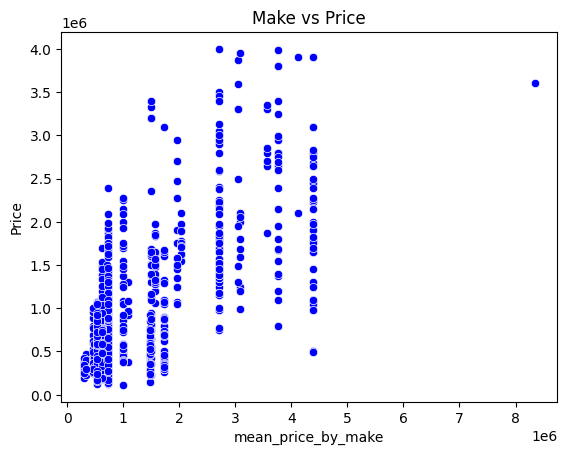

In [72]:
sns.scatterplot(data=data_cat, x="mean_price_by_make", y=df["Price"], color = 'blue')
plt.title("Make vs Price")
plt.show()

Target Encoding 'Location'

In [73]:
mean_location = df.groupby('Location')['Price'].mean().to_dict()
data_cat['mean_location'] = data_cat['Location'].map(mean_location)

In [74]:
data_cat = data_cat.drop('Location', axis = 1)

- Ordinal Encoding (for ordinal categories)
- One-Hot Encoding (for non-ordinal categories)

In [75]:
data_cat.head()

,Fuel Type,Transmission,Color,Owner,Seller Type,Drivetrain,mean_price_by_make,mean_location
0,Petrol,Manual,Grey,First,Other,FWD,6.221076e+05,1.977764e+06
1,Diesel,Manual,White,Second,Individual,FWD,5.348000e+05,1.475745e+06
3,Petrol,Manual,Red,First,Individual,FWD,1.729545e+06,7.424000e+05
5,Petrol,Manual,Grey,First,Individual,FWD,5.348000e+05,1.977764e+06
6,Petrol,Automatic,White,Second,Individual,FWD,4.384860e+06,1.721570e+06


In [76]:
Fuel_Type_Encoded = pd.get_dummies(data_cat['Fuel Type'], prefix='Fuel_Type', drop_first=True).astype(int)
Fuel_Type_Encoded.head()

,Fuel_Type_Other,Fuel_Type_Petrol
0,0,1
1,0,0
3,0,1
5,0,1
6,0,1


In [77]:
data_cat = pd.concat([data_cat, Fuel_Type_Encoded], axis=1)
data_cat = data_cat.drop('Fuel Type', axis=1)

In [78]:
Transmission_Encoded = pd.get_dummies(data_cat['Transmission'], prefix='Transmission', drop_first=True).astype(int)
Transmission_Encoded.head()

,Transmission_Manual
0,1
1,1
3,1
5,1
6,0


In [79]:
data_cat = pd.concat([data_cat, Transmission_Encoded], axis=1)
data_cat = data_cat.drop('Transmission', axis=1)

In [80]:
Color_Encoded = pd.get_dummies(data_cat['Color'], prefix='Color', drop_first=True).astype(int)
Color_Encoded.head()

,Color_Blue,Color_Brown,Color_Grey,Color_Other,Color_Red,Color_Silver,Color_White
0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,1
3,0,0,0,0,1,0,0
5,0,0,1,0,0,0,0
6,0,0,0,0,0,0,1


In [81]:
data_cat = pd.concat([data_cat, Color_Encoded], axis=1)
data_cat = data_cat.drop('Color', axis=1)

In [82]:
data_cat['Owner'].unique()

array(['First', 'Second', 'Other'], dtype=object)

In [83]:
Owener_map = {'First': 1, 'Second': 2, 'Third': 3, 'Other': 4}
data_cat['Owner'] = data_cat['Owner'].map(Owener_map)

In [84]:
data_cat['Owner'].unique()

array([1, 2, 4])

In [85]:
Seller_Type_Encoded = pd.get_dummies(data_cat['Seller Type'], prefix='Seller_Type', drop_first=True).astype(int)
Seller_Type_Encoded.head()

,Seller_Type_Other
0,1
1,0
3,0
5,0
6,0


In [86]:
data_cat = pd.concat([data_cat, Seller_Type_Encoded], axis=1)
data_cat = data_cat.drop('Seller Type', axis=1)

In [87]:
Drivetrain_encoded = pd.get_dummies(data_cat['Drivetrain'], prefix='Drivetrain', drop_first=True).astype(int)
Drivetrain_encoded.head()

,Drivetrain_FWD,Drivetrain_RWD
0,1,0
1,1,0
3,1,0
5,1,0
6,1,0


In [88]:
data_cat = pd.concat([data_cat, Drivetrain_encoded], axis=1)
data_cat = data_cat.drop('Drivetrain', axis=1)

In [89]:
data_cat.head()

,Owner,mean_price_by_make,mean_location,Fuel_Type_Other,Fuel_Type_Petrol,Transmission_Manual,Color_Blue,Color_Brown,Color_Grey,Color_Other,Color_Red,Color_Silver,Color_White,Seller_Type_Other,Drivetrain_FWD,Drivetrain_RWD
0,1,6.221076e+05,1.977764e+06,0,1,1,0,0,1,0,0,0,0,1,1,0
1,2,5.348000e+05,1.475745e+06,0,0,1,0,0,0,0,0,0,1,0,1,0
3,1,1.729545e+06,7.424000e+05,0,1,1,0,0,0,0,1,0,0,0,1,0
5,1,5.348000e+05,1.977764e+06,0,1,1,0,0,1,0,0,0,0,0,1,0
6,2,4.384860e+06,1.721570e+06,0,1,0,0,0,0,0,0,0,1,0,1,0


In [90]:
data_num.head()

,Price,Kilometer,Engine,Length,Width,Height,Seating Capacity,Fuel Tank Capacity,power_per_rpm,torque_per_rpm,Age
0,505000,87150,1198.0,3990.0,1680.0,1505.0,5.0,35.0,0.014500,0.024222,5
1,450000,75000,1248.0,3995.0,1695.0,1555.0,5.0,42.0,0.018500,0.095000,8
3,799000,37500,1197.0,3995.0,1745.0,1510.0,5.0,37.0,0.013667,0.026905,3
5,675000,73315,1373.0,4490.0,1730.0,1485.0,5.0,43.0,0.015167,0.032500,5
6,1898999,47000,1991.0,4630.0,1777.0,1432.0,5.0,50.0,0.032909,0.250000,7


In [91]:
data_num['mean_price_by_make'] = data_cat.pop('mean_price_by_make')
data_num['mean_location'] = data_cat.pop('mean_location')
data_num['Owner'] = data_cat.pop('Owner')

In [92]:
data_cat.head()

,Fuel_Type_Other,Fuel_Type_Petrol,Transmission_Manual,Color_Blue,Color_Brown,Color_Grey,Color_Other,Color_Red,Color_Silver,Color_White,Seller_Type_Other,Drivetrain_FWD,Drivetrain_RWD
0,0,1,1,0,0,1,0,0,0,0,1,1,0
1,0,0,1,0,0,0,0,0,0,1,0,1,0
3,0,1,1,0,0,0,0,1,0,0,0,1,0
5,0,1,1,0,0,1,0,0,0,0,0,1,0
6,0,1,0,0,0,0,0,0,0,1,0,1,0


In [93]:
data_num.head()

,Price,Kilometer,Engine,Length,Width,Height,Seating Capacity,Fuel Tank Capacity,power_per_rpm,torque_per_rpm,Age,mean_price_by_make,mean_location,Owner
0,505000,87150,1198.0,3990.0,1680.0,1505.0,5.0,35.0,0.014500,0.024222,5,6.221076e+05,1.977764e+06,1
1,450000,75000,1248.0,3995.0,1695.0,1555.0,5.0,42.0,0.018500,0.095000,8,5.348000e+05,1.475745e+06,2
3,799000,37500,1197.0,3995.0,1745.0,1510.0,5.0,37.0,0.013667,0.026905,3,1.729545e+06,7.424000e+05,1
5,675000,73315,1373.0,4490.0,1730.0,1485.0,5.0,43.0,0.015167,0.032500,5,5.348000e+05,1.977764e+06,1
6,1898999,47000,1991.0,4630.0,1777.0,1432.0,5.0,50.0,0.032909,0.250000,7,4.384860e+06,1.721570e+06,2


In [94]:
data_num['Seating Capacity'].value_counts()

Seating Capacity
5.0    1245
Name: count, dtype: int64

In [95]:
data_num = data_num.drop('Seating Capacity', axis=1)

In [96]:
data_num.head()

,Price,Kilometer,Engine,Length,Width,Height,Fuel Tank Capacity,power_per_rpm,torque_per_rpm,Age,mean_price_by_make,mean_location,Owner
0,505000,87150,1198.0,3990.0,1680.0,1505.0,35.0,0.014500,0.024222,5,6.221076e+05,1.977764e+06,1
1,450000,75000,1248.0,3995.0,1695.0,1555.0,42.0,0.018500,0.095000,8,5.348000e+05,1.475745e+06,2
3,799000,37500,1197.0,3995.0,1745.0,1510.0,37.0,0.013667,0.026905,3,1.729545e+06,7.424000e+05,1
5,675000,73315,1373.0,4490.0,1730.0,1485.0,43.0,0.015167,0.032500,5,5.348000e+05,1.977764e+06,1
6,1898999,47000,1991.0,4630.0,1777.0,1432.0,50.0,0.032909,0.250000,7,4.384860e+06,1.721570e+06,2


In [97]:
data_cat.head()

,Fuel_Type_Other,Fuel_Type_Petrol,Transmission_Manual,Color_Blue,Color_Brown,Color_Grey,Color_Other,Color_Red,Color_Silver,Color_White,Seller_Type_Other,Drivetrain_FWD,Drivetrain_RWD
0,0,1,1,0,0,1,0,0,0,0,1,1,0
1,0,0,1,0,0,0,0,0,0,1,0,1,0
3,0,1,1,0,0,0,0,1,0,0,0,1,0
5,0,1,1,0,0,1,0,0,0,0,0,1,0
6,0,1,0,0,0,0,0,0,0,1,0,1,0


In [98]:
X_num = data_num.drop('Price', axis=1)
y = data_num['Price']

In [99]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_num_scaled = pd.DataFrame(scaler.fit_transform(X_num),columns=X_num.columns, index=X_num.index)

In [100]:
X_final = pd.concat([X_num_scaled, data_cat],axis=1)

In [101]:
X_final.head()

,Kilometer,Engine,Length,Width,Height,Fuel Tank Capacity,power_per_rpm,torque_per_rpm,Age,mean_price_by_make,...,Color_Blue,Color_Brown,Color_Grey,Color_Other,Color_Red,Color_Silver,Color_White,Seller_Type_Other,Drivetrain_FWD,Drivetrain_RWD
0,1.380321,-0.667012,-0.482432,-0.694726,-0.485755,-1.230110,-0.810937,-1.035787,-0.196664,-0.509043,...,0,0,1,0,0,0,0,1,1,0
1,0.918761,-0.504624,-0.466941,-0.489032,0.203405,-0.439140,-0.390709,0.032357,0.773666,-0.598109,...,0,0,0,0,0,0,1,0,1,0
3,-0.505806,-0.670259,-0.466941,0.196611,-0.416839,-1.004119,-0.898485,-0.995303,-0.843550,0.620701,...,0,0,0,0,1,0,0,0,1,0
5,0.854751,-0.098656,1.066612,-0.009082,-0.761419,-0.326145,-0.740899,-0.910862,-0.196664,-0.598109,...,0,0,1,0,0,0,0,0,1,0
6,-0.144916,1.908452,1.500344,0.635423,-1.491929,0.464825,1.123068,2.371540,0.450223,3.329499,...,0,0,0,0,0,0,1,0,1,0


In [102]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.2, random_state=42)

In [103]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor

In [104]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [105]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 300770.9393
- Mean Absolute Error: 199210.4603
- R2 Score: 0.8203
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 309959.6819
- Mean Absolute Error: 207393.3710
- R2 Score: 0.7573


Lasso
Model performance for Training set
- Root Mean Squared Error: 300770.9421
- Mean Absolute Error: 199209.3227
- R2 Score: 0.8203
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 309961.4004
- Mean Absolute Error: 207391.9543
- R2 Score: 0.7573


Ridge
Model performance for Training set
- Root Mean Squared Error: 300790.8555
- Mean Absolute Error: 199028.5015
- R2 Score: 0.8202
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 310000.2198
- Mean Absolute Error: 207163.5830
- R2 Score: 0.7573


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 217336.9064
- Mean 

In [106]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
7,CatBoosting Regressor,0.854770
5,Random Forest Regressor,0.825361
6,XGBRegressor,0.821241
4,Decision Tree,0.764577
0,Linear Regression,0.757332
1,Lasso,0.757330
2,Ridge,0.757269
3,K-Neighbors Regressor,0.734833
8,AdaBoost Regressor,0.713614
